In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def euclidean_distance(x1,y1, x2,y2):
    return ((x1-x2)**2 + (y1-y2)**2 )**0.5

In [3]:
file = open("for_ant_colony_algorithm.txt", "r")
content = file.readlines ()
file.close()
items = [int(x) for x in content[0][1:-1].split(',')] 

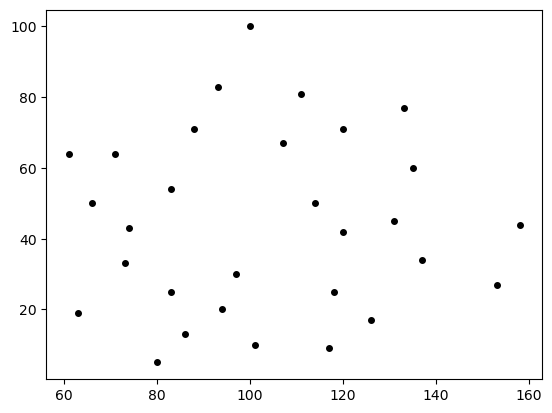

In [4]:
x = np.linspace(0,200,200)
l_x = items[0:len(items)//2]
l_y = items[len(items)//2:]
plt.plot(l_x,l_y,"ok",markersize=4)
plt.show()
l = []
for i in range(len(l_x)): l.append([items[i],items[len(l_x)+i]])

n = len(l_x)

In [5]:
alpha = 1
beta = 5
rho = 0.5
max_ants = n

distance_matrix = []
pheromone_matrix = []
for i in range(n):
    d = []
    ph = []
    for j in range(n):
        d.append(euclidean_distance(l_x[i],l_y[i], l_x[j],l_y[j]))
        ph.append(1/n)
    distance_matrix.append(d)
    pheromone_matrix.append(ph)


# print(l_x,'\n',l_y,'\n',distance_matrix,'\n', pheromone_matrix)

In [6]:
def f2(current_point,points): # gets number of current point and numbers of points not yet passed
    p = []
    
    for i in range(len(points)):
        sum = 0
        for j in range(len(points)):
            # if current_point == points[j]: print("AAAA")
            sum += (pheromone_matrix[current_point][points[j]]**alpha) * ((1/distance_matrix[current_point][points[j]])**beta)
        p.append( (pheromone_matrix[current_point][points[i]]**alpha) * ((1/distance_matrix[current_point][points[i]])**beta) / (sum) )

    index = points[p.index(max(p))]
    return index # point INDEX

# qq = [0,0,0,1,0,0]
# print(qq.index(max(qq)))

In [7]:
def f4(paths_matrix,distance_matrix,max_ants):
    distances = []
    
    for i in range(max_ants):
        di = 0
        for j in range(n-1):
            di += distance_matrix[ paths_matrix[i][j] ][ paths_matrix[i][j+1] ]
        distances.append(di)
        # print(di)
    return distances


In [8]:
def f3(pheromone_matrix,distances,paths_matrix,q,max_ants): # updating pheromone matrix

    for i in range(max_ants):
        for j in range(n-1):
            pheromone_matrix[ paths_matrix[i][j] ][  paths_matrix[i][j+1] ] = pheromone_matrix[ paths_matrix[i][j] ][  paths_matrix[i][j+1] ] * (1 - rho) + q / distances[i]
            
    # for i in range(n):
    #     print(pheromone_matrix[i])
    return pheromone_matrix

In [9]:
def f1(alpha,beta,rho,max_ants,pheromone_matrix):
    q = 100
    e_l = 0
    counter = 3
    
    paths_matrix = [] # matrix of numbers of points traversed by each ant
    best_dist = 100*n 
    
    best_path = []
    
    for h in range(max_ants):  # initialising the starting position of each ant
        r = random.randint(0,n-1)
        path = [r]
        paths_matrix.append(path)
    
    flag = 0
    while flag == 0:
        e_l += 1
        counter += 1
        for h in range(max_ants):  # every ant
            path = paths_matrix[h]
            
            for i in range(n-1): # goes through n-1 points (because the 1st one was generated)
                points_j = []
                for j in range(n):
                    if j in path: pass
                    else: points_j.append(j) # adding point INDEX
                path.append(f2(path[i],points_j))
            paths_matrix[h] = path[0:]
            # print(path)
        
        distances = f4(paths_matrix,distance_matrix,max_ants)
        pheromone_matrix = f3(pheromone_matrix,distances,paths_matrix,q,max_ants)
    
        for i in range(max_ants):
            if distances[i] <= best_dist:
                best_dist = distances[i]
                best_path = paths_matrix[i]
                counter = 0
    
        for i in range(max_ants):
            paths_matrix[i] = [paths_matrix[i][-1]]
        # print(*paths_matrix)
        
        if counter == 3 or e_l == 10: flag = 1
    # print(e_l)
    return [best_path,e_l,best_dist]

res = f1(alpha,beta,rho,max_ants,pheromone_matrix)
best_path = res[0]
print(best_path)
print(res[2])
print(res[1])

[1, 23, 4, 27, 8, 20, 29, 24, 14, 10, 22, 12, 9, 17, 7, 28, 21, 25, 5, 13, 2, 15, 11, 3, 6, 26, 19, 18, 16, 0]
447.3426280491872
5


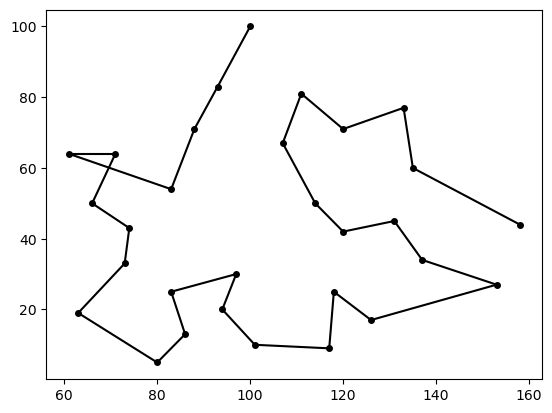

In [10]:
# visualisation
x = np.linspace(0,200,200)

plt.plot(l_x,l_y,"ok",markersize=4)
# print(best_path)

for i in range(n-1):
    plt.plot([l[best_path[i]][0], l[best_path[i+1]][0]], [l[best_path[i]][1], l[best_path[i+1]][1]],"k")
plt.show()

In [11]:
# alpha = 1
# beta = 5
# rho = 0.5 # 
# max_ants = 30

[5, 15, 25, 35]


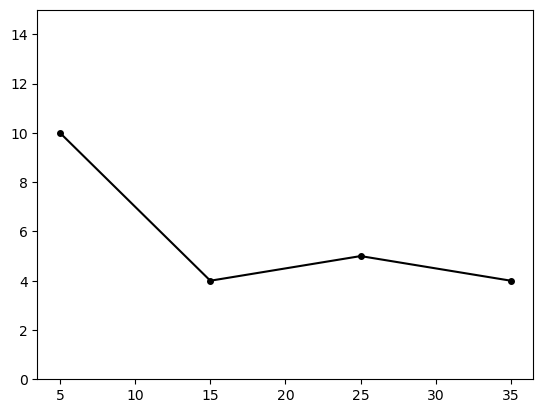

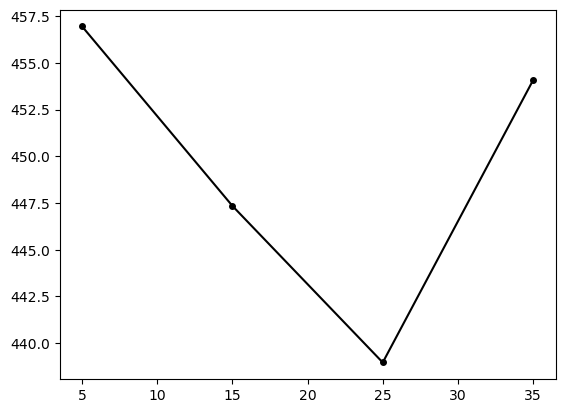

In [12]:
# a. Number of ants
max_ants_l = []
for i in range(4): max_ants_l.append(i*10+5)
print(max_ants_l)
c = []
best_dist = []
for i in range(len(max_ants_l)):
    res = f1(alpha,beta,rho,max_ants_l[i],pheromone_matrix)
    c.append(res[1])
    best_dist.append(res[2])
    
x = np.linspace(0,50,100)
plt.plot(max_ants_l,c,"k",markersize=4)
plt.plot(max_ants_l,c,"ko",markersize=4)
plt.ylim(0,15)
plt.show()

x1 = np.linspace(0,50,100)
plt.plot(max_ants_l,best_dist,"k",markersize=4)
plt.plot(max_ants_l,best_dist,"ko",markersize=4)
# plt.ylim(0,10)
plt.show()

[0.0, 0.3, 0.6, 0.8999999999999999]


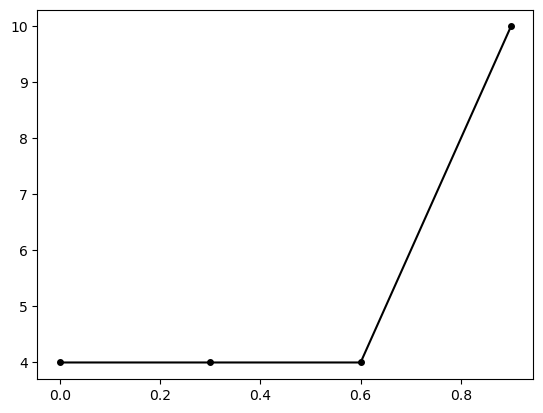

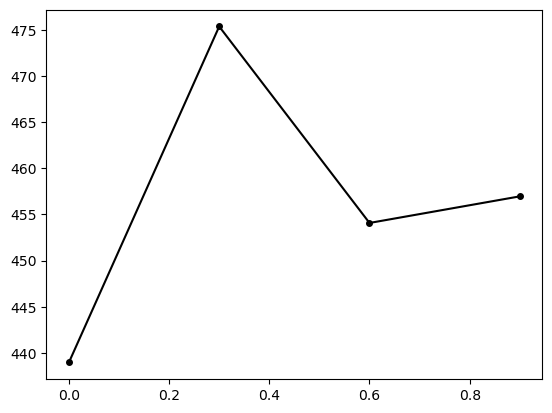

In [13]:
# b. rho.

rho_l = []
for i in range(4): rho_l.append(i*0.3)
print(rho_l)
c = []
best_dist = []
for i in range(len(rho_l)):
    res = f1(alpha,beta,rho_l[i],max_ants,pheromone_matrix)
    c.append(res[1])
    best_dist.append(res[2])
    
x = np.linspace(0,50,100)
plt.plot(rho_l,c,"k",markersize=4)
plt.plot(rho_l,c,"ko",markersize=4)
# plt.ylim(0,10)
plt.show()

x1 = np.linspace(0,50,100)
plt.plot(rho_l,best_dist,"k",markersize=4)
plt.plot(rho_l,best_dist,"ko",markersize=4)
# plt.ylim(0,10)
plt.show()

In [14]:
# c.  a/b

alpha_l = [0.5,1,1,1]
beta_l = [5,1,2,0.1]

c = []
best_dist = []
for i in range(len(alpha_l)):
    res = f1(alpha_l[i],beta_l[i],rho,max_ants,pheromone_matrix)
    # c.append(res[1])
    # best_dist.append(res[2])
    print("alpha",alpha_l[i],"beta",beta_l[i],"| count of iterations - ",res[1], "best path - ",res[2])
    

alpha 0.5 beta 5 | count of iterations -  5 best path -  438.9586162019898
alpha 1 beta 1 | count of iterations -  7 best path -  456.9544824895518
alpha 1 beta 2 | count of iterations -  4 best path -  438.9586162019898
alpha 1 beta 0.1 | count of iterations -  4 best path -  438.9586162019898
